In [2]:
# Check to see that we are using the GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Amount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Experiment write/read from the amounted drive: 
import numpy as np

test_file = '/content/gdrive/My Drive/save_test.npy'
a = np.zeros((4,4))
np.save(test_file, a)

In [4]:
# You can always ls:
!ls /content/gdrive/My\ Drive

'Colab Notebooks'
'Copy of T.F. Newport 0212 Invitation.gform'
'Getting started.pdf'
 GU_mesh14_95x.zip
 GU_mesh14_95y.zip
 IMG_1075.JPG
 prj1_keypoints
 save_test.npy
'T.F. Newport 0212 Invitation.gform'


In [15]:
# Load it back:
ap = np.load(test_file)
ap

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## 1. Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [0]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [0]:
import os

In [6]:
# We can save data into google drive and access them from here. But it is faster
# to clone a copy from git: 
!git clone https://github.com/udacity/P1_Facial_Keypoints.git

data_path = './P1_Facial_Keypoints/data'

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5981, done.
remote: Total 5981 (delta 0), reused 0 (delta 0), pack-reused 5981
Receiving objects: 100% (5981/5981), 329.49 MiB | 13.58 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (5803/5803), done.


In [5]:
!ls /content/gdrive/My\ Drive/prj1_keypoints

data_load.py  models.py  train_loss_batch10.npy  train_loss_batch64.npy


In [8]:
# Run the model definition code: 
%run /content/gdrive/My\ Drive/prj1_keypoints/models.py
%run /content/gdrive/My\ Drive/prj1_keypoints/data_load.py

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [9]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you

#%load models.py
#from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout2d(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout2d(p=0.4, inplace=False)
  (fc1): Linear(in_features=43264, out_features=256, bias=True)
  (drop5): Dropout2d(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (drop6): Dropout2d(p=0.6, inplace=False)
  (fc3): Linear(in_fe

## 2. Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [0]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# # the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
# # Since we have run the data_load.py, no need to load them again here. 

# from data_load import FacialKeypointsDataset
# # the transforms we defined in Notebook 1 are in the helper file `data_load.py`
# from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250), RandomCrop(224), Normalize(), ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [0]:
# import pandas as pd

# new_name = 'training_small_sample.csv'

# train_file = os.path.join(data_path, 'training_frames_keypoints.csv')
# df = pd.read_csv(train_file)

# n_samples = 10
# df_new = df.iloc[:n_samples, :]
# df_new.to_csv(os.path.join(data_path, new_name))

In [12]:
# create the transformed dataset
# transformed_dataset = FacialKeypointsDataset(csv_file='data/training_frames_keypoints.csv',
#                                              root_dir='data/training/',
#                                              transform=data_transform)
transformed_dataset = FacialKeypointsDataset(csv_file=os.path.join(data_path, 'training_frames_keypoints.csv'),
                                             root_dir=os.path.join(data_path, 'training/'),
                                             transform=data_transform,
                                             n_samples=None)



print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


In [13]:
type(transformed_dataset.key_pts_frame)
transformed_dataset.key_pts_frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,62.0,130.0,66.0,134.0,73.0,136.0,81.0,139.0,92.0,134.0,96.0,130.0,98.0,126.0,102.0,120.0,102.0,111.0,104.0,105.0,104.0,99.0,102.0,90.0,51.0,89.0,56.0,87.0,60.0,...,68.0,119.0,73.0,117.0,77.0,115.0,79.0,117.0,81.0,115.0,85.0,117.0,90.0,117.0,87.0,122.0,85.0,124.0,81.0,124.0,77.0,124.0,73.0,121.0,70.0,119.0,77.0,119.0,79.0,119.0,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,58.0,130.0,64.0,136.0,73.0,141.0,85.0,143.0,96.0,137.0,102.0,131.0,107.0,124.0,109.0,114.0,111.0,105.0,111.0,97.0,111.0,88.0,111.0,78.0,51.0,83.0,56.0,81.0,62.0,...,70.0,122.0,75.0,122.0,81.0,120.0,83.0,120.0,85.0,120.0,90.0,120.0,94.0,120.0,90.0,124.0,87.0,126.0,83.0,126.0,79.0,126.0,75.0,124.0,70.0,122.0,79.0,122.0,83.0,122.0,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,60.0,111.0,62.0,116.0,67.0,122.0,75.0,127.0,86.0,127.0,96.0,123.0,105.0,121.0,113.0,114.0,118.0,106.0,122.0,100.0,124.0,91.0,128.0,81.0,58.0,56.0,62.0,54.0,67.0,...,67.0,103.0,69.0,101.0,73.0,101.0,75.0,101.0,77.0,101.0,84.0,103.0,88.0,108.0,82.0,110.0,77.0,110.0,75.0,110.0,71.0,110.0,69.0,107.0,67.0,103.0,73.0,103.0,75.0,105.0,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,61.0,141.0,64.0,148.0,73.0,157.0,85.0,163.0,101.0,163.0,116.0,164.0,128.0,161.0,137.0,155.0,144.0,143.0,150.0,134.0,156.0,121.0,162.0,109.0,70.0,68.0,76.0,65.0,85.0,...,76.0,129.0,82.0,130.0,88.0,127.0,91.0,130.0,98.0,130.0,104.0,133.0,110.0,139.0,101.0,142.0,95.0,145.0,88.0,142.0,82.0,142.0,79.0,139.0,76.0,129.0,85.0,133.0,91.0,133.0,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,71.0,136.0,75.0,138.0,81.0,141.0,92.0,143.0,105.0,139.0,113.0,135.0,122.0,129.0,126.0,122.0,128.0,112.0,130.0,103.0,130.0,95.0,130.0,86.0,58.0,81.0,60.0,74.0,64.0,...,75.0,121.0,79.0,117.0,84.0,115.0,86.0,115.0,90.0,113.0,96.0,115.0,103.0,118.0,98.0,122.0,92.0,124.0,88.0,124.0,84.0,126.0,79.0,124.0,77.0,121.0,84.0,117.0,88.0,117.0,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [0]:
# load training data in batches
# batch_size = 10
batch_size = 64

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [0]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
# test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',
#                                              root_dir='data/test/',
#                                              transform=data_transform)

test_dataset = FacialKeypointsDataset(csv_file=os.path.join(data_path, 'test_frames_keypoints.csv'),
                                             root_dir=os.path.join(data_path, 'test/'),
                                             transform=data_transform)

In [0]:
# load test data in batches

# Let's just use the same batch size as the training dataset.
# batch_size = 10
# batch_size = 64

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## 3. Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Make sure the image is a FloatTensor, which the model expects.
3. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [0]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [18]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([64, 1, 224, 224])
torch.Size([64, 68, 2])
torch.Size([64, 68, 2])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [0]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

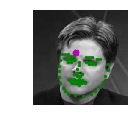

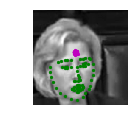

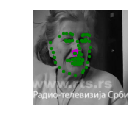

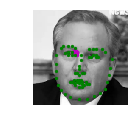

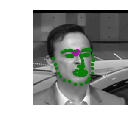

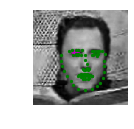

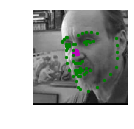

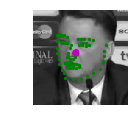

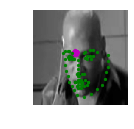

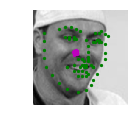

In [20]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

In [21]:
np_test_rst = test_outputs[0].data.numpy()
print(np_test_rst.max())
print(np_test_rst.min())

0.091393195
-0.09660698


## 4. Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [0]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

optimizer = optim.Adam(params=net.parameters())


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [0]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()
    loss_list = []

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()
            
            # print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, loss.item()/1000))

            # print loss statistics
            # to convert loss into a scalar and add it to the running_loss, use .item()
            running_loss += loss.item()
            
            loss_list.append(loss.item())
            # if len(loss_list) % 100 == 99: 

            if batch_i % 10 == 9:    # print every 10 batches
                file_name = '/content/gdrive/My Drive/prj1_keypoints/train_loss_batch{}'.format(batch_size)
                np.save(file_name, np.array(loss_list))
                
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))    
                running_loss = 0.0
            
    return loss_list


In [19]:
# train your network
import datetime

t1 = datetime.datetime.now()

n_epochs = 100 # start small, and increase when you've decided on your model structure and hyperparams
loss_list = train_net(n_epochs)

t2 = datetime.datetime.now()
print("Training time: {}s".format(t2 - t1))

/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is de

Epoch: 1, Batch: 10, Avg. Loss: 0.004590869963169098
Epoch: 1, Batch: 20, Avg. Loss: 0.0028139511942863464
Epoch: 1, Batch: 30, Avg. Loss: 0.0024715936034917832
Epoch: 1, Batch: 40, Avg. Loss: 0.0022347710132598875
Epoch: 1, Batch: 50, Avg. Loss: 0.002655272588133812


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.0022425135970115663
Epoch: 2, Batch: 20, Avg. Loss: 0.002211567372083664
Epoch: 2, Batch: 30, Avg. Loss: 0.0021077356636524202
Epoch: 2, Batch: 40, Avg. Loss: 0.0021920055449008943
Epoch: 2, Batch: 50, Avg. Loss: 0.00221382962167263


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.0021350517868995666
Epoch: 3, Batch: 20, Avg. Loss: 0.002119272693991661
Epoch: 3, Batch: 30, Avg. Loss: 0.0019566361755132674
Epoch: 3, Batch: 40, Avg. Loss: 0.0018910799920558929
Epoch: 3, Batch: 50, Avg. Loss: 0.0022643425762653353


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.00193428373336792
Epoch: 4, Batch: 20, Avg. Loss: 0.001979287087917328
Epoch: 4, Batch: 30, Avg. Loss: 0.002409580662846565
Epoch: 4, Batch: 40, Avg. Loss: 0.0018926953077316284
Epoch: 4, Batch: 50, Avg. Loss: 0.0020547112077474593


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.002237252801656723
Epoch: 5, Batch: 20, Avg. Loss: 0.0017543344497680665
Epoch: 5, Batch: 30, Avg. Loss: 0.002129276752471924
Epoch: 5, Batch: 40, Avg. Loss: 0.0017659535557031632
Epoch: 5, Batch: 50, Avg. Loss: 0.0019156815856695175


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.0018520251512527466
Epoch: 6, Batch: 20, Avg. Loss: 0.001773100659251213
Epoch: 6, Batch: 30, Avg. Loss: 0.002173321008682251
Epoch: 6, Batch: 40, Avg. Loss: 0.0018829063028097152
Epoch: 6, Batch: 50, Avg. Loss: 0.0019343021214008331


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.0020593068152666093
Epoch: 7, Batch: 20, Avg. Loss: 0.0017838528156280517
Epoch: 7, Batch: 30, Avg. Loss: 0.0016533144265413284
Epoch: 7, Batch: 40, Avg. Loss: 0.0017239825576543808
Epoch: 7, Batch: 50, Avg. Loss: 0.001850571945309639


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.0017438137233257293
Epoch: 8, Batch: 20, Avg. Loss: 0.0016512012183666229
Epoch: 8, Batch: 30, Avg. Loss: 0.002184051737189293
Epoch: 8, Batch: 40, Avg. Loss: 0.0018772957921028136
Epoch: 8, Batch: 50, Avg. Loss: 0.0016818139851093293


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.001599570244550705
Epoch: 9, Batch: 20, Avg. Loss: 0.0016915708631277085
Epoch: 9, Batch: 30, Avg. Loss: 0.0018120585530996324
Epoch: 9, Batch: 40, Avg. Loss: 0.0017368946224451064
Epoch: 9, Batch: 50, Avg. Loss: 0.0015104755982756615


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.0017127449065446854
Epoch: 10, Batch: 20, Avg. Loss: 0.0018623326569795608
Epoch: 10, Batch: 30, Avg. Loss: 0.0016719472408294677
Epoch: 10, Batch: 40, Avg. Loss: 0.0015555278807878495
Epoch: 10, Batch: 50, Avg. Loss: 0.0016198855489492417


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.0015615634694695472
Epoch: 11, Batch: 20, Avg. Loss: 0.0016652704179286957
Epoch: 11, Batch: 30, Avg. Loss: 0.0015619402676820755
Epoch: 11, Batch: 40, Avg. Loss: 0.001505029983818531
Epoch: 11, Batch: 50, Avg. Loss: 0.001618032231926918


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.0014017077460885049
Epoch: 12, Batch: 20, Avg. Loss: 0.0014202621430158616
Epoch: 12, Batch: 30, Avg. Loss: 0.001623815856873989
Epoch: 12, Batch: 40, Avg. Loss: 0.0014081037640571595
Epoch: 12, Batch: 50, Avg. Loss: 0.0013411917611956597


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.001342007227241993
Epoch: 13, Batch: 20, Avg. Loss: 0.0013116026371717453
Epoch: 13, Batch: 30, Avg. Loss: 0.0014008068442344665
Epoch: 13, Batch: 40, Avg. Loss: 0.0013578744530677795
Epoch: 13, Batch: 50, Avg. Loss: 0.0013899902626872062


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.001558767296373844
Epoch: 14, Batch: 20, Avg. Loss: 0.0015517960339784622
Epoch: 14, Batch: 30, Avg. Loss: 0.0014954031705856324
Epoch: 14, Batch: 40, Avg. Loss: 0.0013856057450175286
Epoch: 14, Batch: 50, Avg. Loss: 0.0012855309918522835


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.0012558952942490578
Epoch: 15, Batch: 20, Avg. Loss: 0.0011269114837050439
Epoch: 15, Batch: 30, Avg. Loss: 0.001184729591012001
Epoch: 15, Batch: 40, Avg. Loss: 0.001554018832743168
Epoch: 15, Batch: 50, Avg. Loss: 0.0011637288630008697


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.0013238822370767592
Epoch: 16, Batch: 20, Avg. Loss: 0.00114104026556015
Epoch: 16, Batch: 30, Avg. Loss: 0.0013153271526098252
Epoch: 16, Batch: 40, Avg. Loss: 0.0012665001228451729
Epoch: 16, Batch: 50, Avg. Loss: 0.0010652592182159423


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.0012159297317266464
Epoch: 17, Batch: 20, Avg. Loss: 0.0011697910726070405
Epoch: 17, Batch: 30, Avg. Loss: 0.0011212414354085922
Epoch: 17, Batch: 40, Avg. Loss: 0.0011978552639484406
Epoch: 17, Batch: 50, Avg. Loss: 0.0012661257162690162


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.0010659789443016052
Epoch: 18, Batch: 20, Avg. Loss: 0.001249525561928749
Epoch: 18, Batch: 30, Avg. Loss: 0.001223669208586216
Epoch: 18, Batch: 40, Avg. Loss: 0.0010392446219921112
Epoch: 18, Batch: 50, Avg. Loss: 0.0010523486435413361


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.0010804156959056854
Epoch: 19, Batch: 20, Avg. Loss: 0.0012734319195151329
Epoch: 19, Batch: 30, Avg. Loss: 0.0011179285794496536
Epoch: 19, Batch: 40, Avg. Loss: 0.0010186198204755782
Epoch: 19, Batch: 50, Avg. Loss: 0.0012720612436532975


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.0010010800212621688
Epoch: 20, Batch: 20, Avg. Loss: 0.0011697636619210244
Epoch: 20, Batch: 30, Avg. Loss: 0.0011061536446213723
Epoch: 20, Batch: 40, Avg. Loss: 0.001025636613368988
Epoch: 20, Batch: 50, Avg. Loss: 0.0010494011789560318


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.0013485191017389298
Epoch: 21, Batch: 20, Avg. Loss: 0.0013047120422124863
Epoch: 21, Batch: 30, Avg. Loss: 0.0011174567118287086
Epoch: 21, Batch: 40, Avg. Loss: 0.0013023130595684052
Epoch: 21, Batch: 50, Avg. Loss: 0.0009746227115392684


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.0010529301762580872
Epoch: 22, Batch: 20, Avg. Loss: 0.0011158302947878837
Epoch: 22, Batch: 30, Avg. Loss: 0.001012745551764965
Epoch: 22, Batch: 40, Avg. Loss: 0.0011142250224947929
Epoch: 22, Batch: 50, Avg. Loss: 0.0011311131790280341


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.0009430705457925796
Epoch: 23, Batch: 20, Avg. Loss: 0.0013474225327372552
Epoch: 23, Batch: 30, Avg. Loss: 0.0011004901230335237
Epoch: 23, Batch: 40, Avg. Loss: 0.001269716553390026
Epoch: 23, Batch: 50, Avg. Loss: 0.0010144802778959275


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.0009886251538991928
Epoch: 24, Batch: 20, Avg. Loss: 0.0011447481960058213
Epoch: 24, Batch: 30, Avg. Loss: 0.0009385306164622307
Epoch: 24, Batch: 40, Avg. Loss: 0.0011109588220715523
Epoch: 24, Batch: 50, Avg. Loss: 0.0011915332153439521


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.0010945839509367943
Epoch: 25, Batch: 20, Avg. Loss: 0.0012926744073629378
Epoch: 25, Batch: 30, Avg. Loss: 0.0010534261092543602
Epoch: 25, Batch: 40, Avg. Loss: 0.0009353694021701813
Epoch: 25, Batch: 50, Avg. Loss: 0.0011038259118795394


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.0009397503435611725
Epoch: 26, Batch: 20, Avg. Loss: 0.0010305425748229028
Epoch: 26, Batch: 30, Avg. Loss: 0.0010738942623138427
Epoch: 26, Batch: 40, Avg. Loss: 0.0009803561121225358
Epoch: 26, Batch: 50, Avg. Loss: 0.001239050917327404


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.0009110470414161682
Epoch: 27, Batch: 20, Avg. Loss: 0.0010377046391367912
Epoch: 27, Batch: 30, Avg. Loss: 0.0011324091851711274
Epoch: 27, Batch: 40, Avg. Loss: 0.001001278840005398
Epoch: 27, Batch: 50, Avg. Loss: 0.0010416081547737121


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.001027389921247959
Epoch: 28, Batch: 20, Avg. Loss: 0.0009228314906358719
Epoch: 28, Batch: 30, Avg. Loss: 0.0010914754122495652
Epoch: 28, Batch: 40, Avg. Loss: 0.0010568300932645798
Epoch: 28, Batch: 50, Avg. Loss: 0.0011286006644368172


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.0011170907840132712
Epoch: 29, Batch: 20, Avg. Loss: 0.0011013114899396897
Epoch: 29, Batch: 30, Avg. Loss: 0.0010434261634945869
Epoch: 29, Batch: 40, Avg. Loss: 0.0009242404475808143
Epoch: 29, Batch: 50, Avg. Loss: 0.0010486617162823676


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.001001519240438938
Epoch: 30, Batch: 20, Avg. Loss: 0.0010684728398919106
Epoch: 30, Batch: 30, Avg. Loss: 0.0008954233527183532
Epoch: 30, Batch: 40, Avg. Loss: 0.0013418723046779632
Epoch: 30, Batch: 50, Avg. Loss: 0.0008912143781781197


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 31, Batch: 10, Avg. Loss: 0.0008908062800765037
Epoch: 31, Batch: 20, Avg. Loss: 0.0009942696914076806
Epoch: 31, Batch: 30, Avg. Loss: 0.0010557741895318032
Epoch: 31, Batch: 40, Avg. Loss: 0.001049262285232544
Epoch: 31, Batch: 50, Avg. Loss: 0.0009601632431149483


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 32, Batch: 10, Avg. Loss: 0.0010783622935414314
Epoch: 32, Batch: 20, Avg. Loss: 0.0009835570082068444
Epoch: 32, Batch: 30, Avg. Loss: 0.0011190993040800094
Epoch: 32, Batch: 40, Avg. Loss: 0.0010882121697068214
Epoch: 32, Batch: 50, Avg. Loss: 0.0009623309969902039


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 33, Batch: 10, Avg. Loss: 0.0009880191758275033
Epoch: 33, Batch: 20, Avg. Loss: 0.0011060612574219704
Epoch: 33, Batch: 30, Avg. Loss: 0.0012400862500071526
Epoch: 33, Batch: 40, Avg. Loss: 0.0009746972769498825
Epoch: 33, Batch: 50, Avg. Loss: 0.0009602008387446404


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 34, Batch: 10, Avg. Loss: 0.0009758516401052475
Epoch: 34, Batch: 20, Avg. Loss: 0.0010121918469667434
Epoch: 34, Batch: 30, Avg. Loss: 0.0009648038148880005
Epoch: 34, Batch: 40, Avg. Loss: 0.0008658399507403373
Epoch: 34, Batch: 50, Avg. Loss: 0.0010634636580944062


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 35, Batch: 10, Avg. Loss: 0.0009985195472836494
Epoch: 35, Batch: 20, Avg. Loss: 0.0010116545855998994
Epoch: 35, Batch: 30, Avg. Loss: 0.0009893540516495705
Epoch: 35, Batch: 40, Avg. Loss: 0.001166948303580284
Epoch: 35, Batch: 50, Avg. Loss: 0.000944797269999981


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 36, Batch: 10, Avg. Loss: 0.0009509781301021576
Epoch: 36, Batch: 20, Avg. Loss: 0.001039454959332943
Epoch: 36, Batch: 30, Avg. Loss: 0.0010774706080555916
Epoch: 36, Batch: 40, Avg. Loss: 0.001002966895699501
Epoch: 36, Batch: 50, Avg. Loss: 0.0009299050644040107


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 37, Batch: 10, Avg. Loss: 0.0010028773993253708
Epoch: 37, Batch: 20, Avg. Loss: 0.001024021916091442
Epoch: 37, Batch: 30, Avg. Loss: 0.0009204989895224571
Epoch: 37, Batch: 40, Avg. Loss: 0.0010900037139654158
Epoch: 37, Batch: 50, Avg. Loss: 0.001109104797244072


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 38, Batch: 10, Avg. Loss: 0.000915537677705288
Epoch: 38, Batch: 20, Avg. Loss: 0.000902854599058628
Epoch: 38, Batch: 30, Avg. Loss: 0.0009918790832161904
Epoch: 38, Batch: 40, Avg. Loss: 0.0010462539419531821
Epoch: 38, Batch: 50, Avg. Loss: 0.001026048667728901


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 39, Batch: 10, Avg. Loss: 0.0010447791069746017
Epoch: 39, Batch: 20, Avg. Loss: 0.0009952424168586731
Epoch: 39, Batch: 30, Avg. Loss: 0.0008482197523117065
Epoch: 39, Batch: 40, Avg. Loss: 0.0009608079493045807
Epoch: 39, Batch: 50, Avg. Loss: 0.000947370432317257


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 40, Batch: 10, Avg. Loss: 0.0009664071872830391
Epoch: 40, Batch: 20, Avg. Loss: 0.0008981306441128254
Epoch: 40, Batch: 30, Avg. Loss: 0.0010280487537384032
Epoch: 40, Batch: 40, Avg. Loss: 0.0008636380732059478
Epoch: 40, Batch: 50, Avg. Loss: 0.0009750043302774429


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 41, Batch: 10, Avg. Loss: 0.0008885579779744148
Epoch: 41, Batch: 20, Avg. Loss: 0.0009322712346911431
Epoch: 41, Batch: 30, Avg. Loss: 0.0008569590076804161
Epoch: 41, Batch: 40, Avg. Loss: 0.001059818297624588
Epoch: 41, Batch: 50, Avg. Loss: 0.0009062562882900238


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 42, Batch: 10, Avg. Loss: 0.0008889863565564156
Epoch: 42, Batch: 20, Avg. Loss: 0.0008577688187360764
Epoch: 42, Batch: 30, Avg. Loss: 0.000957896888256073
Epoch: 42, Batch: 40, Avg. Loss: 0.001108530767261982
Epoch: 42, Batch: 50, Avg. Loss: 0.0009067806452512741


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 43, Batch: 10, Avg. Loss: 0.0010322216972708702
Epoch: 43, Batch: 20, Avg. Loss: 0.0008319982290267944
Epoch: 43, Batch: 30, Avg. Loss: 0.0009955811649560928
Epoch: 43, Batch: 40, Avg. Loss: 0.0009378373920917511
Epoch: 43, Batch: 50, Avg. Loss: 0.0008974784538149834


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 44, Batch: 10, Avg. Loss: 0.0012356998175382613
Epoch: 44, Batch: 20, Avg. Loss: 0.0009788956567645074
Epoch: 44, Batch: 30, Avg. Loss: 0.0009854363799095154
Epoch: 44, Batch: 40, Avg. Loss: 0.0008334145024418831
Epoch: 44, Batch: 50, Avg. Loss: 0.0008818724974989891


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 45, Batch: 10, Avg. Loss: 0.0009992654174566268
Epoch: 45, Batch: 20, Avg. Loss: 0.0008881577998399734
Epoch: 45, Batch: 30, Avg. Loss: 0.0008800507709383964
Epoch: 45, Batch: 40, Avg. Loss: 0.001096327170729637
Epoch: 45, Batch: 50, Avg. Loss: 0.0009052624702453613


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 46, Batch: 10, Avg. Loss: 0.0008432640805840492
Epoch: 46, Batch: 20, Avg. Loss: 0.001239008828997612
Epoch: 46, Batch: 30, Avg. Loss: 0.000927770733833313
Epoch: 46, Batch: 40, Avg. Loss: 0.0008681695386767388
Epoch: 46, Batch: 50, Avg. Loss: 0.0009536637291312218


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 47, Batch: 10, Avg. Loss: 0.0011398306488990784
Epoch: 47, Batch: 20, Avg. Loss: 0.0008804092332720757
Epoch: 47, Batch: 30, Avg. Loss: 0.0009295707568526268
Epoch: 47, Batch: 40, Avg. Loss: 0.0010951621159911156
Epoch: 47, Batch: 50, Avg. Loss: 0.0009860756769776344


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 48, Batch: 10, Avg. Loss: 0.0008629438728094101
Epoch: 48, Batch: 20, Avg. Loss: 0.0010388341322541236
Epoch: 48, Batch: 30, Avg. Loss: 0.0009798257648944856
Epoch: 48, Batch: 40, Avg. Loss: 0.0008514608368277549
Epoch: 48, Batch: 50, Avg. Loss: 0.0009294444546103477


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 49, Batch: 10, Avg. Loss: 0.0009095185920596123
Epoch: 49, Batch: 20, Avg. Loss: 0.0008660778850317001
Epoch: 49, Batch: 30, Avg. Loss: 0.0010531416833400727
Epoch: 49, Batch: 40, Avg. Loss: 0.0009042123705148697
Epoch: 49, Batch: 50, Avg. Loss: 0.0011292845979332924


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 50, Batch: 10, Avg. Loss: 0.0008378968760371209
Epoch: 50, Batch: 20, Avg. Loss: 0.0010648747608065605
Epoch: 50, Batch: 30, Avg. Loss: 0.0010091940388083458
Epoch: 50, Batch: 40, Avg. Loss: 0.0008323970958590508
Epoch: 50, Batch: 50, Avg. Loss: 0.0008606267645955086


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 51, Batch: 10, Avg. Loss: 0.0008898936286568642
Epoch: 51, Batch: 20, Avg. Loss: 0.000863907277584076
Epoch: 51, Batch: 30, Avg. Loss: 0.0009243545830249786
Epoch: 51, Batch: 40, Avg. Loss: 0.0008683393225073815
Epoch: 51, Batch: 50, Avg. Loss: 0.0010668201074004173


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 52, Batch: 10, Avg. Loss: 0.0009475246518850327
Epoch: 52, Batch: 20, Avg. Loss: 0.0009339916706085205
Epoch: 52, Batch: 30, Avg. Loss: 0.0009043779820203781
Epoch: 52, Batch: 40, Avg. Loss: 0.0009527856260538101
Epoch: 52, Batch: 50, Avg. Loss: 0.0009888900071382523


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 53, Batch: 10, Avg. Loss: 0.0008061485253274441
Epoch: 53, Batch: 20, Avg. Loss: 0.000959412470459938
Epoch: 53, Batch: 30, Avg. Loss: 0.001026616282761097
Epoch: 53, Batch: 40, Avg. Loss: 0.0008756304681301117
Epoch: 53, Batch: 50, Avg. Loss: 0.0008142646178603173


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 54, Batch: 10, Avg. Loss: 0.0009913217425346374
Epoch: 54, Batch: 20, Avg. Loss: 0.0008333272933959961
Epoch: 54, Batch: 30, Avg. Loss: 0.0009854299798607827
Epoch: 54, Batch: 40, Avg. Loss: 0.0008071044310927391
Epoch: 54, Batch: 50, Avg. Loss: 0.000860510990023613


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 55, Batch: 10, Avg. Loss: 0.0010108820125460626
Epoch: 55, Batch: 20, Avg. Loss: 0.0008407012894749642
Epoch: 55, Batch: 30, Avg. Loss: 0.0010338147655129433
Epoch: 55, Batch: 40, Avg. Loss: 0.000845664620399475
Epoch: 55, Batch: 50, Avg. Loss: 0.0008064805343747139


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 56, Batch: 10, Avg. Loss: 0.0008386356458067893
Epoch: 56, Batch: 20, Avg. Loss: 0.0008841321468353271
Epoch: 56, Batch: 30, Avg. Loss: 0.0009835937842726707
Epoch: 56, Batch: 40, Avg. Loss: 0.0010696195885539054
Epoch: 56, Batch: 50, Avg. Loss: 0.0010275822281837464


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 57, Batch: 10, Avg. Loss: 0.0009411109164357185
Epoch: 57, Batch: 20, Avg. Loss: 0.0008273357525467873
Epoch: 57, Batch: 30, Avg. Loss: 0.0009807669520378113
Epoch: 57, Batch: 40, Avg. Loss: 0.0009129650294780732
Epoch: 57, Batch: 50, Avg. Loss: 0.0008095885664224625


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 58, Batch: 10, Avg. Loss: 0.0007529084980487824
Epoch: 58, Batch: 20, Avg. Loss: 0.00101058691740036
Epoch: 58, Batch: 30, Avg. Loss: 0.0009514893889427186
Epoch: 58, Batch: 40, Avg. Loss: 0.0011699882745742798
Epoch: 58, Batch: 50, Avg. Loss: 0.0008813646212220192


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 59, Batch: 10, Avg. Loss: 0.0009369635134935379
Epoch: 59, Batch: 20, Avg. Loss: 0.0008654532358050346
Epoch: 59, Batch: 30, Avg. Loss: 0.0009604621976613999
Epoch: 59, Batch: 40, Avg. Loss: 0.000980515591800213
Epoch: 59, Batch: 50, Avg. Loss: 0.0008550681173801422


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 60, Batch: 10, Avg. Loss: 0.00088129723072052
Epoch: 60, Batch: 20, Avg. Loss: 0.0008742375448346138
Epoch: 60, Batch: 30, Avg. Loss: 0.0009851795956492425
Epoch: 60, Batch: 40, Avg. Loss: 0.0009428508579730988
Epoch: 60, Batch: 50, Avg. Loss: 0.0010073483511805535


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 61, Batch: 10, Avg. Loss: 0.0008503060340881348
Epoch: 61, Batch: 20, Avg. Loss: 0.0008756344243884087
Epoch: 61, Batch: 30, Avg. Loss: 0.0008383614160120487
Epoch: 61, Batch: 40, Avg. Loss: 0.0010200539082288742
Epoch: 61, Batch: 50, Avg. Loss: 0.0008339845277369022


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 62, Batch: 10, Avg. Loss: 0.0009192241877317429
Epoch: 62, Batch: 20, Avg. Loss: 0.0010107156708836556
Epoch: 62, Batch: 30, Avg. Loss: 0.000806243747472763
Epoch: 62, Batch: 40, Avg. Loss: 0.000976734884083271
Epoch: 62, Batch: 50, Avg. Loss: 0.0009005744382739067


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 63, Batch: 10, Avg. Loss: 0.0009476080387830734
Epoch: 63, Batch: 20, Avg. Loss: 0.000802332703024149
Epoch: 63, Batch: 30, Avg. Loss: 0.0009348779693245888
Epoch: 63, Batch: 40, Avg. Loss: 0.0008914012610912323
Epoch: 63, Batch: 50, Avg. Loss: 0.0008956732600927353


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 64, Batch: 10, Avg. Loss: 0.0008586465008556843
Epoch: 64, Batch: 20, Avg. Loss: 0.0008631030097603798
Epoch: 64, Batch: 30, Avg. Loss: 0.0011391613595187664
Epoch: 64, Batch: 40, Avg. Loss: 0.0008591019138693809
Epoch: 64, Batch: 50, Avg. Loss: 0.0009151514545083046


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 65, Batch: 10, Avg. Loss: 0.0009067094400525093
Epoch: 65, Batch: 20, Avg. Loss: 0.0010432158038020133
Epoch: 65, Batch: 30, Avg. Loss: 0.0008753758892416954
Epoch: 65, Batch: 40, Avg. Loss: 0.0008458823710680008
Epoch: 65, Batch: 50, Avg. Loss: 0.0008968340307474136


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 66, Batch: 10, Avg. Loss: 0.0008304142504930496
Epoch: 66, Batch: 20, Avg. Loss: 0.0010799553990364075
Epoch: 66, Batch: 30, Avg. Loss: 0.0009714281931519508
Epoch: 66, Batch: 40, Avg. Loss: 0.0009478573426604271
Epoch: 66, Batch: 50, Avg. Loss: 0.0009183532670140267


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 67, Batch: 10, Avg. Loss: 0.0008316612504422665
Epoch: 67, Batch: 20, Avg. Loss: 0.0007960834577679635
Epoch: 67, Batch: 30, Avg. Loss: 0.0008725123926997184
Epoch: 67, Batch: 40, Avg. Loss: 0.0008778071254491806
Epoch: 67, Batch: 50, Avg. Loss: 0.0009697064012289047


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 68, Batch: 10, Avg. Loss: 0.0008181439042091369
Epoch: 68, Batch: 20, Avg. Loss: 0.001000097207725048
Epoch: 68, Batch: 30, Avg. Loss: 0.0008003213293850422
Epoch: 68, Batch: 40, Avg. Loss: 0.0008060787171125412
Epoch: 68, Batch: 50, Avg. Loss: 0.0008917173147201538


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 69, Batch: 10, Avg. Loss: 0.000900445394217968
Epoch: 69, Batch: 20, Avg. Loss: 0.0009023003950715065
Epoch: 69, Batch: 30, Avg. Loss: 0.0009714346006512642
Epoch: 69, Batch: 40, Avg. Loss: 0.0008491951636970043
Epoch: 69, Batch: 50, Avg. Loss: 0.0009237484261393547


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 70, Batch: 10, Avg. Loss: 0.0009283865839242935
Epoch: 70, Batch: 20, Avg. Loss: 0.00094877839833498
Epoch: 70, Batch: 30, Avg. Loss: 0.000978773906826973
Epoch: 70, Batch: 40, Avg. Loss: 0.0009575276300311089
Epoch: 70, Batch: 50, Avg. Loss: 0.001036227747797966


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 71, Batch: 10, Avg. Loss: 0.0009147494882345199
Epoch: 71, Batch: 20, Avg. Loss: 0.000811606302857399
Epoch: 71, Batch: 30, Avg. Loss: 0.001001683808863163
Epoch: 71, Batch: 40, Avg. Loss: 0.0008410954587161541
Epoch: 71, Batch: 50, Avg. Loss: 0.0008887271881103516


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 72, Batch: 10, Avg. Loss: 0.0008324735835194588
Epoch: 72, Batch: 20, Avg. Loss: 0.0008758328221738339
Epoch: 72, Batch: 30, Avg. Loss: 0.000738415502011776
Epoch: 72, Batch: 40, Avg. Loss: 0.0009807055033743382
Epoch: 72, Batch: 50, Avg. Loss: 0.0008333583362400531


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 73, Batch: 10, Avg. Loss: 0.0010523479580879212
Epoch: 73, Batch: 20, Avg. Loss: 0.0007967675924301147
Epoch: 73, Batch: 30, Avg. Loss: 0.0008980462104082107
Epoch: 73, Batch: 40, Avg. Loss: 0.0008196985758841037
Epoch: 73, Batch: 50, Avg. Loss: 0.0007512025088071823


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 74, Batch: 10, Avg. Loss: 0.0008997387439012527
Epoch: 74, Batch: 20, Avg. Loss: 0.0010108039677143097
Epoch: 74, Batch: 30, Avg. Loss: 0.0008731794357299805
Epoch: 74, Batch: 40, Avg. Loss: 0.0008882720991969108
Epoch: 74, Batch: 50, Avg. Loss: 0.000848158024251461


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 75, Batch: 10, Avg. Loss: 0.0012953825742006303
Epoch: 75, Batch: 20, Avg. Loss: 0.000868725873529911
Epoch: 75, Batch: 30, Avg. Loss: 0.0007898649349808692
Epoch: 75, Batch: 40, Avg. Loss: 0.0008694057613611221
Epoch: 75, Batch: 50, Avg. Loss: 0.000814041018486023


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 76, Batch: 10, Avg. Loss: 0.0008269302807748318
Epoch: 76, Batch: 20, Avg. Loss: 0.0008816474005579948
Epoch: 76, Batch: 30, Avg. Loss: 0.000885700237005949
Epoch: 76, Batch: 40, Avg. Loss: 0.0010917578861117363
Epoch: 76, Batch: 50, Avg. Loss: 0.0010559711493551731


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 77, Batch: 10, Avg. Loss: 0.0007666210457682609
Epoch: 77, Batch: 20, Avg. Loss: 0.0008218626827001572
Epoch: 77, Batch: 30, Avg. Loss: 0.0008074108175933361
Epoch: 77, Batch: 40, Avg. Loss: 0.0007439598403871059
Epoch: 77, Batch: 50, Avg. Loss: 0.0013043073937296867


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 78, Batch: 10, Avg. Loss: 0.0009196392707526684
Epoch: 78, Batch: 20, Avg. Loss: 0.0009073949754238129
Epoch: 78, Batch: 30, Avg. Loss: 0.0011582840457558632
Epoch: 78, Batch: 40, Avg. Loss: 0.0007819648198783398
Epoch: 78, Batch: 50, Avg. Loss: 0.0007712519317865372


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 79, Batch: 10, Avg. Loss: 0.000788033477962017
Epoch: 79, Batch: 20, Avg. Loss: 0.0008206275254487992
Epoch: 79, Batch: 30, Avg. Loss: 0.0010413643792271613
Epoch: 79, Batch: 40, Avg. Loss: 0.0008374709039926529
Epoch: 79, Batch: 50, Avg. Loss: 0.0008173231892287731


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 80, Batch: 10, Avg. Loss: 0.0008832911103963852
Epoch: 80, Batch: 20, Avg. Loss: 0.0009251465573906899
Epoch: 80, Batch: 30, Avg. Loss: 0.0010674917176365852
Epoch: 80, Batch: 40, Avg. Loss: 0.0008465228006243706
Epoch: 80, Batch: 50, Avg. Loss: 0.0007721692658960819


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 81, Batch: 10, Avg. Loss: 0.0009018851071596146
Epoch: 81, Batch: 20, Avg. Loss: 0.0007831327095627785
Epoch: 81, Batch: 30, Avg. Loss: 0.0009868689700961112
Epoch: 81, Batch: 40, Avg. Loss: 0.0008761748597025871
Epoch: 81, Batch: 50, Avg. Loss: 0.0008368916809558868


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 82, Batch: 10, Avg. Loss: 0.0010235159918665887
Epoch: 82, Batch: 20, Avg. Loss: 0.0008723709359765053
Epoch: 82, Batch: 30, Avg. Loss: 0.0009935016930103303
Epoch: 82, Batch: 40, Avg. Loss: 0.0008822643384337425
Epoch: 82, Batch: 50, Avg. Loss: 0.0007445491291582585


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 83, Batch: 10, Avg. Loss: 0.000819327712059021
Epoch: 83, Batch: 20, Avg. Loss: 0.0011006604582071305
Epoch: 83, Batch: 30, Avg. Loss: 0.0010783848389983178
Epoch: 83, Batch: 40, Avg. Loss: 0.0008222501613199711
Epoch: 83, Batch: 50, Avg. Loss: 0.00082331582903862


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 84, Batch: 10, Avg. Loss: 0.0008162640556693077
Epoch: 84, Batch: 20, Avg. Loss: 0.0008763018250465393
Epoch: 84, Batch: 30, Avg. Loss: 0.0008487299419939518
Epoch: 84, Batch: 40, Avg. Loss: 0.000889363557100296
Epoch: 84, Batch: 50, Avg. Loss: 0.0011566565707325936


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 85, Batch: 10, Avg. Loss: 0.0009392348527908325
Epoch: 85, Batch: 20, Avg. Loss: 0.0010860804766416549
Epoch: 85, Batch: 30, Avg. Loss: 0.0008048456832766532
Epoch: 85, Batch: 40, Avg. Loss: 0.0008893055096268654
Epoch: 85, Batch: 50, Avg. Loss: 0.0008131097070872784


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 86, Batch: 10, Avg. Loss: 0.000845418132841587
Epoch: 86, Batch: 20, Avg. Loss: 0.0008653826043009758
Epoch: 86, Batch: 30, Avg. Loss: 0.0008345840834081173
Epoch: 86, Batch: 40, Avg. Loss: 0.0008027748987078667
Epoch: 86, Batch: 50, Avg. Loss: 0.0007637214735150337


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 87, Batch: 10, Avg. Loss: 0.0009426731020212173
Epoch: 87, Batch: 20, Avg. Loss: 0.0009164695367217064
Epoch: 87, Batch: 30, Avg. Loss: 0.0009148029461503029
Epoch: 87, Batch: 40, Avg. Loss: 0.0010493755638599396
Epoch: 87, Batch: 50, Avg. Loss: 0.0008025730401277542


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 88, Batch: 10, Avg. Loss: 0.0008292076177895069
Epoch: 88, Batch: 20, Avg. Loss: 0.0007804530337452889
Epoch: 88, Batch: 30, Avg. Loss: 0.0008441224023699761
Epoch: 88, Batch: 40, Avg. Loss: 0.000857886914163828
Epoch: 88, Batch: 50, Avg. Loss: 0.0007669369280338288


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 89, Batch: 10, Avg. Loss: 0.0007999786213040351
Epoch: 89, Batch: 20, Avg. Loss: 0.000779862754046917
Epoch: 89, Batch: 30, Avg. Loss: 0.000879791047424078
Epoch: 89, Batch: 40, Avg. Loss: 0.000861385352909565
Epoch: 89, Batch: 50, Avg. Loss: 0.0008467478044331074


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 90, Batch: 10, Avg. Loss: 0.0008776367381215095
Epoch: 90, Batch: 20, Avg. Loss: 0.0008678557500243186
Epoch: 90, Batch: 30, Avg. Loss: 0.0007972718961536885
Epoch: 90, Batch: 40, Avg. Loss: 0.000953929491341114
Epoch: 90, Batch: 50, Avg. Loss: 0.001030644927173853


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 91, Batch: 10, Avg. Loss: 0.0010566975697875022
Epoch: 91, Batch: 20, Avg. Loss: 0.0008562538996338844
Epoch: 91, Batch: 30, Avg. Loss: 0.0009403209388256073
Epoch: 91, Batch: 40, Avg. Loss: 0.0007580302096903324
Epoch: 91, Batch: 50, Avg. Loss: 0.0008415094576776028


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 92, Batch: 10, Avg. Loss: 0.0008251145407557487
Epoch: 92, Batch: 20, Avg. Loss: 0.0007331690527498722
Epoch: 92, Batch: 30, Avg. Loss: 0.0008277624621987343
Epoch: 92, Batch: 40, Avg. Loss: 0.0008461475148797035
Epoch: 92, Batch: 50, Avg. Loss: 0.0008397934772074223


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 93, Batch: 10, Avg. Loss: 0.0008615417703986168
Epoch: 93, Batch: 20, Avg. Loss: 0.0008358285427093506
Epoch: 93, Batch: 30, Avg. Loss: 0.0008289356231689453
Epoch: 93, Batch: 40, Avg. Loss: 0.0008221008554100991
Epoch: 93, Batch: 50, Avg. Loss: 0.0008841959685087204


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 94, Batch: 10, Avg. Loss: 0.0008327363058924675
Epoch: 94, Batch: 20, Avg. Loss: 0.0009093075916171073
Epoch: 94, Batch: 30, Avg. Loss: 0.0007304055467247963
Epoch: 94, Batch: 40, Avg. Loss: 0.0007976819314062596
Epoch: 94, Batch: 50, Avg. Loss: 0.0008250432834029198


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 95, Batch: 10, Avg. Loss: 0.00085908517614007
Epoch: 95, Batch: 20, Avg. Loss: 0.0008311695829033852
Epoch: 95, Batch: 30, Avg. Loss: 0.0007815283536911011
Epoch: 95, Batch: 40, Avg. Loss: 0.0010491932854056359
Epoch: 95, Batch: 50, Avg. Loss: 0.0008548497557640076


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 96, Batch: 10, Avg. Loss: 0.0008458946868777275
Epoch: 96, Batch: 20, Avg. Loss: 0.0008011964857578277
Epoch: 96, Batch: 30, Avg. Loss: 0.0007657311782240867
Epoch: 96, Batch: 40, Avg. Loss: 0.0009609869681298733
Epoch: 96, Batch: 50, Avg. Loss: 0.0007992551401257515


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 97, Batch: 10, Avg. Loss: 0.0008737810365855693
Epoch: 97, Batch: 20, Avg. Loss: 0.0008316482752561569
Epoch: 97, Batch: 30, Avg. Loss: 0.00098278971016407
Epoch: 97, Batch: 40, Avg. Loss: 0.0008171188682317734
Epoch: 97, Batch: 50, Avg. Loss: 0.0007810676954686642


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 98, Batch: 10, Avg. Loss: 0.0007561460137367248
Epoch: 98, Batch: 20, Avg. Loss: 0.0009118715152144432
Epoch: 98, Batch: 30, Avg. Loss: 0.0007979285493493081
Epoch: 98, Batch: 40, Avg. Loss: 0.0007983435429632663
Epoch: 98, Batch: 50, Avg. Loss: 0.0008240114971995354


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 99, Batch: 10, Avg. Loss: 0.0008444287069141865
Epoch: 99, Batch: 20, Avg. Loss: 0.0008682208806276322
Epoch: 99, Batch: 30, Avg. Loss: 0.0010510212033987046
Epoch: 99, Batch: 40, Avg. Loss: 0.0010888950489461422
Epoch: 99, Batch: 50, Avg. Loss: 0.0008142118006944656


/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/content/gdrive/My Drive/prj1_keypoints/data_load.py:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 100, Batch: 10, Avg. Loss: 0.0008981841541826725
Epoch: 100, Batch: 20, Avg. Loss: 0.0007362877950072289
Epoch: 100, Batch: 30, Avg. Loss: 0.0008361121788620949
Epoch: 100, Batch: 40, Avg. Loss: 0.0011128406673669815
Epoch: 100, Batch: 50, Avg. Loss: 0.0008382936380803585
Training time: 9:51:19.920354s


In [4]:
# plt.plot(loss_list)
!ls /Dr

haha


In [0]:
def loss_hist_by_epoch(loss_10_batch):
    # Convert the loss every 10 batches to the average loss per epoch (340 batches)
    pnts_per_epoch = 34
    n_pnt = loss_10_batch.shape[0]
    
    loss_per_epoch = []
    i_start = 0
    while i_start < n_pnt-1:
        i_end = i_start + pnts_per_epoch
        loss_per_epoch.append(loss_10_batch[i_start:i_end].mean())
        i_start = i_end
        
    return loss_per_epoch
    
plt.plot(loss_hist_by_epoch(loss_hist))
plt.xlabel('Epoch')
plt.ylabel('1000 x MSE')

In [0]:
def loss_hist_by_epoch(fname_batch_loss, n_total_samples, batch_size):
    loss_per_batch = np.load(fname_batch_loss)

    n_batches_per_epoch = np.ceil(n_total_samples / batch_size)
    n_epochs = np.ceil(loss_per_batch.shape[0] / n_batches_per_epoch)

    loss_per_epoch = []
    while loss_per_batch.shape[0] > 0:
        


## 5. Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [0]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

In [0]:
# def untransform_keypoints(output_pnts):
#     # Convert the output from the neural network back into meaningful point locations
    
#     output_pnts = output_pnts.view(output_pnts.size()[0], 68, -1)
#     output_pnts = output_pnts.data
#     output_pnts = output_pnts.numpy()
#     # print(output_pnts.shape)
#     output_pnts = output_pnts * 50. + 100.
    
#     return output_pnts

In [0]:
# untransform_keypoints(test_outputs[0])

In [0]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)

Once you've found a good model (or two), save your model so you can load it and use it later!

In [0]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: write your answer here (double click to edit this cell)

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: write your answer here

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: write your answer here

## 6. Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

In [0]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()


filter_index = 0
print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(w[i][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

In [0]:
##TODO: load in and display any image from the transformed test dataset
img_index = 3
# img_sample = test_images[img_index][0]
# print(img_sample.shape)
# print(type(img_sample))

image = test_images[img_index].data   # get the image from it's wrapper
image = image.numpy()   # convert to numpy array from a Tensor

print(image.shape)
print("The min value:", np.amin(image))
print("The max value:", np.amax(image))
plt.imshow(image[0], cmap='gray')


## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

In [0]:
import cv2

In [0]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
for ind, ax in enumerate(axes.flat):
    filtered = cv2.filter2D(src=image, ddepth=-1, kernel=w[ind][0])
    ax.imshow(filtered[0], cmap='gray')

In [0]:
w.shape

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: (does it detect vertical lines or does it blur out noise, etc.) write your answer here

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!